## **Creación de modelos**

### 0. Importando librerías

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


### 1. Cargando los datos

- Algunas partes del código son tomadas de este notebook: [Heart Disease Prediction](https://www.kaggle.com/code/andls555/heart-disease-prediction)
- Son los datos limpiados en el notebook 03 y guardados en el repositorio en GitHub:

In [2]:
url = "https://raw.githubusercontent.com/ArleyF/proyecto_enfermedades_cardiacas/master/dataset/heart_2020_cleaned.csv"
df = pd.read_csv(url)

In [3]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,7.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,1,1,4,8.0,1,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,1,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,0,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0


### 2. Entrenamiento

- Sacando muestras:

In [4]:
# Se separa la columna con la información de los sobrevivientes
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

In [5]:
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Estandarización:

In [6]:
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

### 3. Modelos

- Función para evaluar los modelos:

In [7]:
def evaluate_model(model, x_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

- Función para imprimir las métricas

In [8]:
def imprimir_resultados(modelo_eval):
    print('Accuracy:', modelo_eval['acc'])
    print('Precision:', modelo_eval['prec'])
    print('Recall:', modelo_eval['rec'])
    print('F1 Score:', modelo_eval['f1'])
    print('Cohens Kappa Score:', modelo_eval['kappa'])
    print('Area Under Curve:', modelo_eval['auc'])
    print('Confusion Matrix:\n', modelo_eval['cm'])

#### 3.1. Regresión logística

In [9]:
logreg = LogisticRegression(random_state=0, max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluar modelo
logreg_eval = evaluate_model(logreg, X_test, y_test)

# Resultados
imprimir_resultados(logreg_eval)

Accuracy: 0.912881689832549
Precision: 0.5108225108225108
Recall: 0.0844062947067239
F1 Score: 0.1448741559238797
Cohens Kappa Score: 0.12313107569833648
Area Under Curve: 0.8255755666508892
Confusion Matrix:
 [[57915   452]
 [ 5120   472]]


#### 3.2. Vecinos más cercanos

In [10]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

# Evaluar modelo
knn_eval = evaluate_model(knn, X_test, y_test)

# Resultados
imprimir_resultados(knn_eval)

Accuracy: 0.9040010006410356
Precision: 0.36244979919678716
Recall: 0.12911301859799715
F1 Score: 0.19040084388185657
Cohens Kappa Score: 0.151426767548428
Area Under Curve: 0.701154579504121
Confusion Matrix:
 [[57097  1270]
 [ 4870   722]]


#### 3.3. Árbol de decisión

In [11]:
#Entrenamiento
decision_tree = DecisionTreeClassifier(random_state=False)
decision_tree.fit(X_train, y_train)

# Evaluar modelo
decision_tree_eval = evaluate_model(decision_tree, X_test, y_test)

# Resultados
imprimir_resultados(decision_tree_eval)

Accuracy: 0.8606451007676793
Precision: 0.2264865755229781
Recall: 0.24588698140200285
F1 Score: 0.23578839063705734
Cohens Kappa Score: 0.15926298910113368
Area Under Curve: 0.5846675678877964
Confusion Matrix:
 [[53671  4696]
 [ 4217  1375]]


#### 3.4. Redes neuronales

In [12]:
#Entrenamiento
neunet = MLPClassifier(alpha=1, max_iter=500)
neunet.fit(X_train, y_train)

#Evaluar modelo
neunet_eval = evaluate_model(neunet, X_test, y_test)

# Resultados
imprimir_resultados(neunet_eval)

Accuracy: 0.9138823308682125
Precision: 0.5549738219895288
Recall: 0.07582260371959942
F1 Score: 0.13341724354940213
Cohens Kappa Score: 0.11481177586662983
Area Under Curve: 0.8262913858937035
Confusion Matrix:
 [[58027   340]
 [ 5168   424]]


#### 3.5. Máquina  de  vectores  de soporte

In [13]:
#Entrenamiento
SVM = SVC(probability=True, max_iter=500)
SVM.fit(X_train, y_train)

#Evaluar modelo
SVM_eval = evaluate_model(SVM, X_test, y_test)

# Resultados
imprimir_resultados(SVM_eval)

c:\Python310\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.845557310151816
Precision: 0.06513798701298701
Recall: 0.05740343347639485
F1 Score: 0.061026615969581754
Cohens Kappa Score: -0.022749396403559663
Area Under Curve: 0.3746328697651947
Confusion Matrix:
 [[53760  4607]
 [ 5271   321]]


#### 3.6. Bosques aleatorios

In [14]:
#Entrenamiento
rng = np.random.RandomState(0)
randomF = RandomForestClassifier(n_estimators=10, random_state=rng)
randomF.fit(X_train, y_train)

#Evaluar modelo
randomF_eval = evaluate_model(randomF, X_test, y_test)

# Resultados
imprimir_resultados(randomF_eval)


Accuracy: 0.9019684485373443
Precision: 0.327217125382263
Recall: 0.1148068669527897
F1 Score: 0.16997617156473394
Cohens Kappa Score: 0.13048551662722574
Area Under Curve: 0.735979623029583
Confusion Matrix:
 [[57047  1320]
 [ 4950   642]]


#### 3.7. Naive-Bayes

In [15]:
#Entrenamiento
naiveB = GaussianNB()
naiveB.fit(X_train, y_train)

#Evaluar modelo
naiveB_eval = evaluate_model(naiveB, X_test, y_test)

# Resultados
imprimir_resultados(naiveB_eval)

Accuracy: 0.8452133397958067
Precision: 0.26868556701030927
Recall: 0.44742489270386265
F1 Score: 0.3357487922705314
Cohens Kappa Score: 0.25427576023808596
Area Under Curve: 0.7990070041243885
Confusion Matrix:
 [[51557  6810]
 [ 3090  2502]]


### 4. Comparación

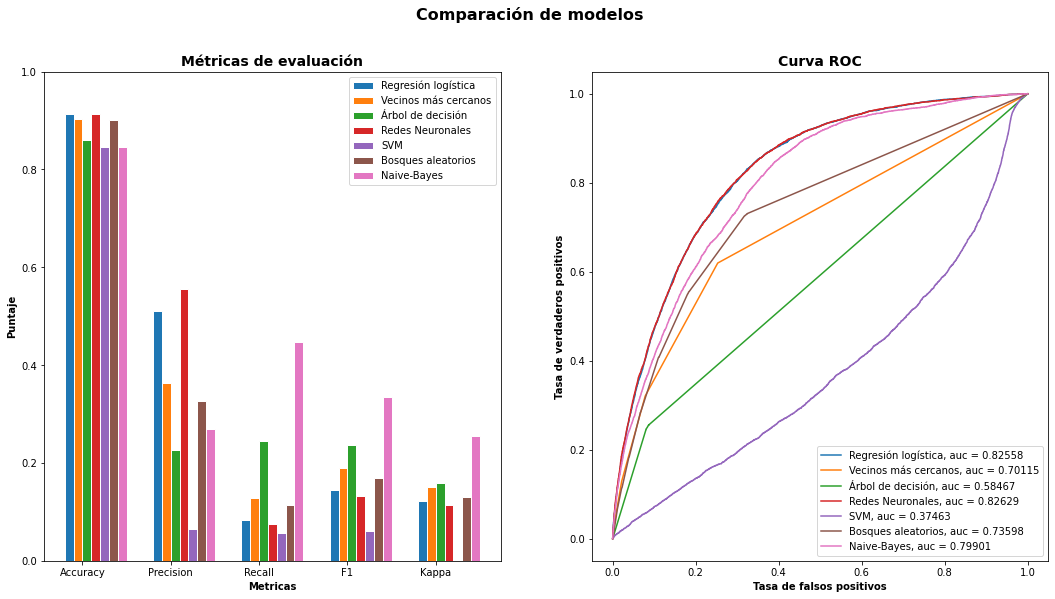

In [18]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparación de modelos', fontsize=16, fontweight='bold')
fig.set_figheight(9)
fig.set_figwidth(18)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
logreg_score = [logreg_eval['acc'], logreg_eval['prec'], logreg_eval['rec'], logreg_eval['f1'], logreg_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
decision_tree_score = [decision_tree_eval['acc'], decision_tree_eval['prec'], decision_tree_eval['rec'], decision_tree_eval['f1'], decision_tree_eval['kappa']]
neunet_score = [neunet_eval['acc'], neunet_eval['prec'], neunet_eval['rec'], neunet_eval['f1'], neunet_eval['kappa']]
SVM_score = [SVM_eval['acc'], SVM_eval['prec'], SVM_eval['rec'], SVM_eval['f1'], SVM_eval['kappa']]
randomF_score = [randomF_eval['acc'], randomF_eval['prec'], randomF_eval['rec'], randomF_eval['f1'], randomF_eval['kappa']]
naiveB_score = [naiveB_eval['acc'], naiveB_eval['prec'], naiveB_eval['rec'], naiveB_eval['f1'], naiveB_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(logreg_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

## Make the plot
ax1.bar(r1, logreg_score, width=barWidth, edgecolor='white', label='Regresión logística')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='Vecinos más cercanos')
ax1.bar(r3, decision_tree_score, width=barWidth, edgecolor='white', label='Árbol de decisión')
ax1.bar(r4, neunet_score, width=barWidth, edgecolor='white', label='Redes Neuronales')
ax1.bar(r5, SVM_score, width=barWidth, edgecolor='white', label='SVM')
ax1.bar(r6, randomF_score, width=barWidth, edgecolor='white', label='Bosques aleatorios')
ax1.bar(r7, naiveB_score, width=barWidth, edgecolor='white', label='Naive-Bayes')

## Configure x and y axis
ax1.set_xlabel('Metricas', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(logreg_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Puntaje', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Métricas de evaluación', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(logreg_eval['fpr'], logreg_eval['tpr'], label='Regresión logística, auc = {:0.5f}'.format(logreg_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='Vecinos más cercanos, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(decision_tree_eval['fpr'], decision_tree_eval['tpr'], label='Árbol de decisión, auc = {:0.5f}'.format(decision_tree_eval['auc']))
ax2.plot(neunet_eval['fpr'], neunet_eval['tpr'], label='Redes Neuronales, auc = {:0.5f}'.format(neunet_eval['auc']))
ax2.plot(SVM_eval['fpr'], SVM_eval['tpr'], label='SVM, auc = {:0.5f}'.format(SVM_eval['auc']))
ax2.plot(randomF_eval['fpr'], randomF_eval['tpr'], label='Bosques aleatorios, auc = {:0.5f}'.format(randomF_eval['auc']))
ax2.plot(naiveB_eval['fpr'], naiveB_eval['tpr'], label='Naive-Bayes, auc = {:0.5f}'.format(naiveB_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('Tasa de falsos positivos', fontweight='bold')
ax2.set_ylabel('Tasa de verdaderos positivos', fontweight='bold')

## Create legend & title
ax2.set_title('Curva ROC', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()